NIM  = 2109116010
Nama = Nur Avivah

In [58]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [59]:
#dataset
df = pd.read_csv("ChurnBank.csv")

In [60]:
df

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
1,6684,711323283,Attrited Customer,57,M,Uneducated,Married,$60K - $80K,Blue,2527.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
5,9597,715076358,Attrited Customer,57,M,Post-Graduate,Unknown,$80K - $120K,Blue,23714.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
8,5016,795599883,Attrited Customer,57,F,Uneducated,Married,Unknown,Blue,2404.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0


# BUSINESS UNDERSTANDING
1. Tujuan perusahaan ini adalah sebagai pemberi jasa pelayanan perbankan agar masyarakat merasa nyaman dan aman ketika menyimpan dana yang mereka miliki.
2. Dataset ini digunakan untuk mengetahui detail para nasabah. Sehingga jika kedepannya nasabah ingin melakukan pinjaman, dapat dipertimbangkan melalui dataset ini.
3. Dengan menggunakan Naive Bayes, dapat diperoleh hasil keterangan bahwa apakah nasabah ini berhak mendapatkan pinjaman atau tidak

DATA UNDERSTANDING
df1 = AttritedCustomer, 
df2 = bukan attiredCustomer,
df3 = Usia < 50,
df4 = customer single

In [61]:
#variabel
df1 = df[df["Attrition_Flag"] == 'Attrited Customer']
df2 = df[df["Attrition_Flag"] != "Attrited Customer"]
df3 = df[df["Customer_Age"] < 50]
df4 = df[df["Marital_Status"] == 'Single']

In [62]:
# syntax ini menghasilkan info dari dataFrame yang ada. dilihat dari hasilnya, terdapat 10 kolom yang mewakili tiap informasi didalam data. 
# ada 20 row data di tiap kolomnya yang semua terisi (tidak ada data Null atau kosong). terdapat juga rincian tipedata yang digunakan yaitu: float, integer, dan string
# penggunaan memori dari dataFrame tersebut bertambah 1,7 kb 
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20 non-null     int64  
 1   CLIENTNUM        20 non-null     int64  
 2   Attrition_Flag   20 non-null     object 
 3   Customer_Age     20 non-null     int64  
 4   Gender           20 non-null     object 
 5   Education_Level  20 non-null     object 
 6   Marital_Status   20 non-null     object 
 7   Income_Category  20 non-null     object 
 8   Card_Category    20 non-null     object 
 9   Credit_Limit     20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


- OPSIONAL -
nilai rata-rata, min, max, dan standar deviasi tiap kolom bertipe angka

In [63]:
nilai_tengah = df[["Customer_Age","Credit_Limit"]].mean()
minimal = df[["Customer_Age", "Credit_Limit"]].min()
maksimal = df[["Customer_Age", "Credit_Limit"]].max()
deviasi =  df[["Customer_Age", "Credit_Limit"]].std()

In [64]:
nilai_tengah

Customer_Age      47.25
Credit_Limit    8114.58
dtype: float64

In [65]:
minimal

Customer_Age      32.0
Credit_Limit    1438.3
dtype: float64

In [66]:
maksimal

Customer_Age       59.0
Credit_Limit    26792.0
dtype: float64

In [67]:
deviasi

Customer_Age       7.859791
Credit_Limit    8331.036819
dtype: float64

# VISUALISASI COMPARISON

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

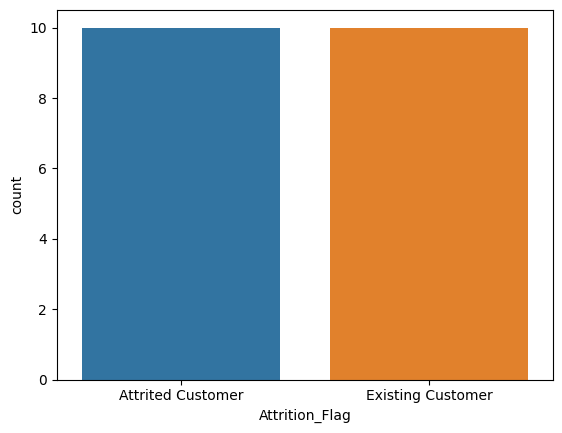

In [68]:
#visualisasi perbandingan attrited customer dan  non-attrited customer
sns.countplot(data = df,  x = "Attrition_Flag")

dari visualisasi diatas, didapat bahwa attrited customer dan existing customer bernilai sama yaitu 10.

<AxesSubplot:xlabel='count', ylabel='Education_Level'>

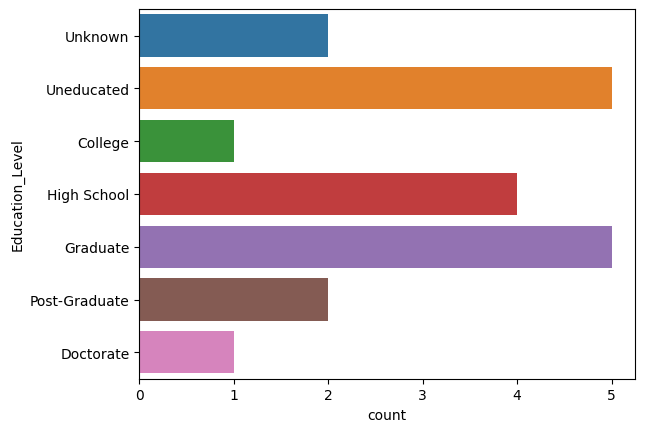

In [69]:
#visualisasi banyak education level
sns.countplot(data = df, y = "Education_Level")

Dari visualisasi diatas, kita bisa mengetahui education level customer beserta dengan jumlahnya. berdasarkan bar, hitungan tertinggi berada pada level edukasi uneducated dan graduated. 

<AxesSubplot:xlabel='count', ylabel='Education_Level'>

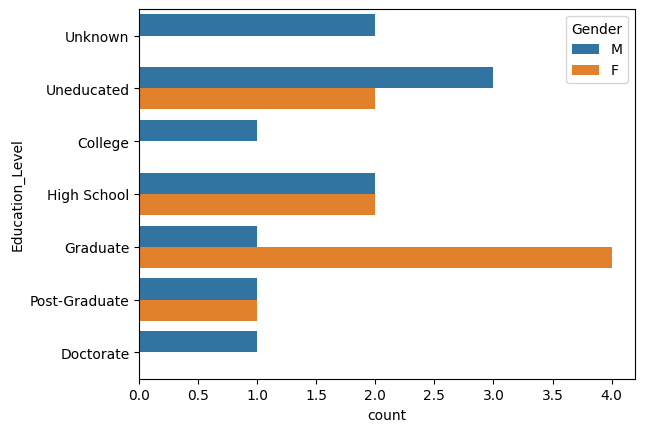

In [70]:
#Visualisasi education level berdasarkan gender
sns.countplot(data = df, y = "Education_Level", hue = "Gender" )

dari grafik diatas, didapat informasi bahwa customer dengan level edukasi educated lebih banyak yang wanita. sedangkan untuk lelaki lebih banyak yang uneducated.

# VISUALISASI DISTRIBUTION

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

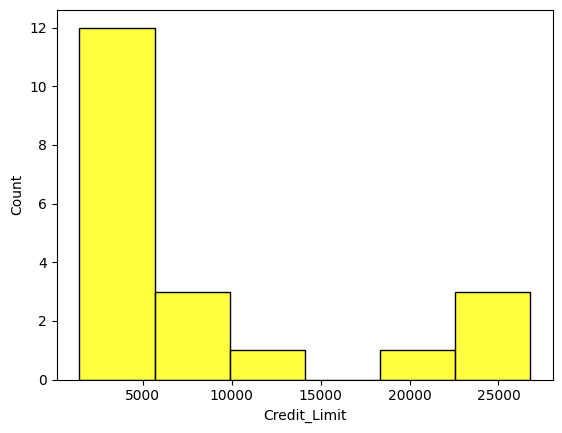

In [71]:
#histogram kredit limit
sns.histplot(data = df, x = "Credit_Limit", color = "yellow")

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

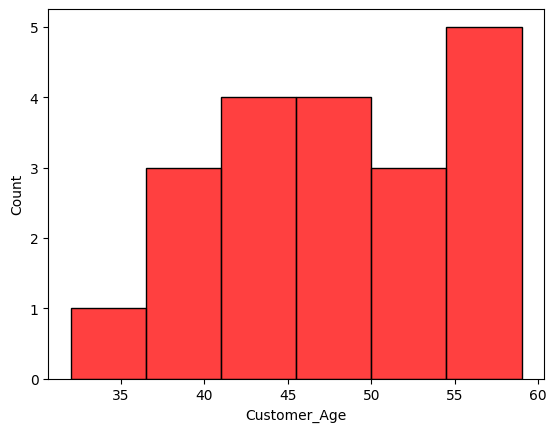

In [72]:
# #histogram umur customer
sns.histplot(data = df, x = "Customer_Age", color = "Red")

Visualisasi histogram diatas memperlihatkan rentang umur dan kredit limit beserta jumlahnya. 
pada histogram kredit limit, kita dapat memperkirakan bahwa kredit limit tertinggi berada di rentang 0 - 6000k dengan jumlah sebanyak 12 orang customer.
pada histogram  umur customer, kita bisa melihat bahwa customer terbanyak ada di rentang umur 54 - 60 tahun.

<AxesSubplot:xlabel='Credit_Limit'>

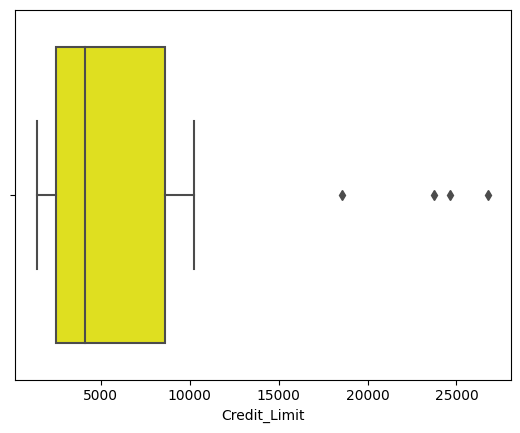

In [73]:
#boxplot credit limit
sns.boxplot(data = df, x =  "Credit_Limit", color = "yellow" )

<AxesSubplot:xlabel='Customer_Age'>

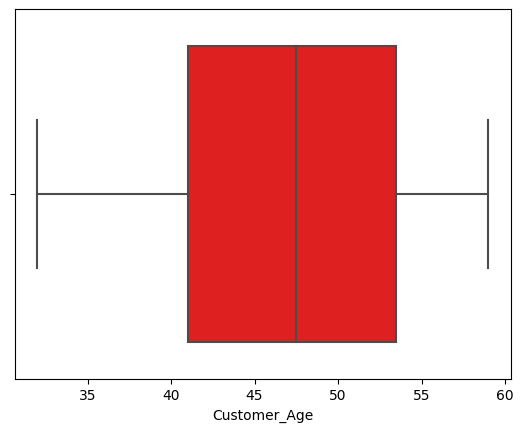

In [74]:
#boxplot umur
sns.boxplot(data  = df, x = "Customer_Age", color = "Red")

boxplot diagram untuk credit_limit menunjukkan bahwa nilai tengah dari credit limit adalah < 5000 serta terdapat 4 outlier.
boxplot diagram untuk customer age menunjukkan bahwa nilai tengah dari umur kustomer berada di antara 45 dan 50

# VISUALISASI RELATIONSHIP

<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

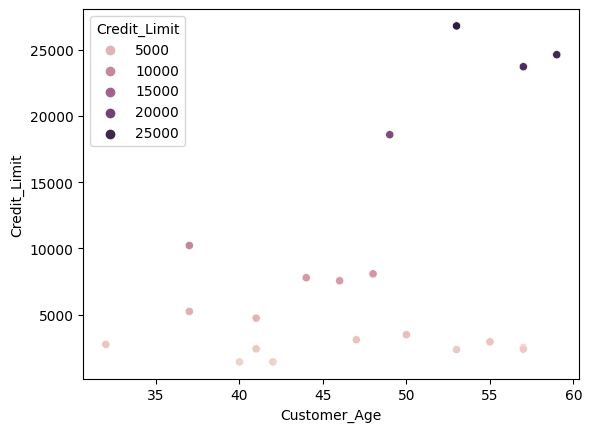

In [75]:
#scatterplot customer age dan credit limit
sns.scatterplot(data = df, x = "Customer_Age", y = "Credit_Limit", hue = "Credit_Limit")

berdasarkan scatterplot diatas, kredit limit dengan nilai 5000 hampir dimiliki oleh semua umur. sedangkan nilai kredit limit tertinggi berada di kustomer dengan kustomer yang berusia antara 50 dan 55 tahun

# VISUALISASI COMPOSITION

In [76]:
#pieplot education level
px.pie(df, names = "Education_Level")

Dari pieplot diatas kita dapat melihat kategori tiap edukation level customer yang disertai dengan banyaknya persentasi. sehingga kita dapat membandingkan dengan jelas

In [77]:
#pieplot income category
px.pie(df, names= "Income_Category")

dari pie diagram diatas kita mendapatkan info bahwa customer banyak yang berpenghasilan < $40k serta $60k - $80k

## OPSIONAL

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

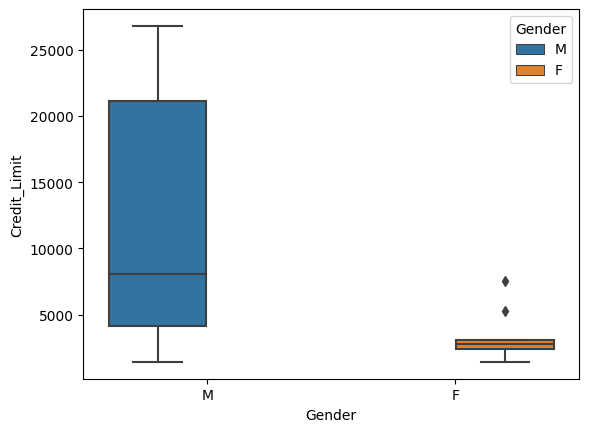

In [78]:
#visualisasi boxplot credit dard dengan jenis kelamin sebagai pemisahnya
sns.boxplot(df, y = "Credit_Limit", x  = "Gender", hue = "Gender")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Attrition_Flag'>

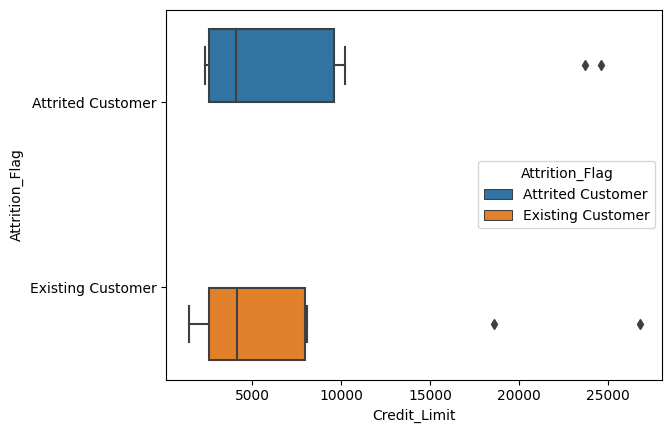

In [79]:
#visualisasi boxplot credit limit dengan attrition flag sebagai pemisahnya
sns.boxplot(df, x = "Credit_Limit", y = "Attrition_Flag", hue = "Attrition_Flag")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

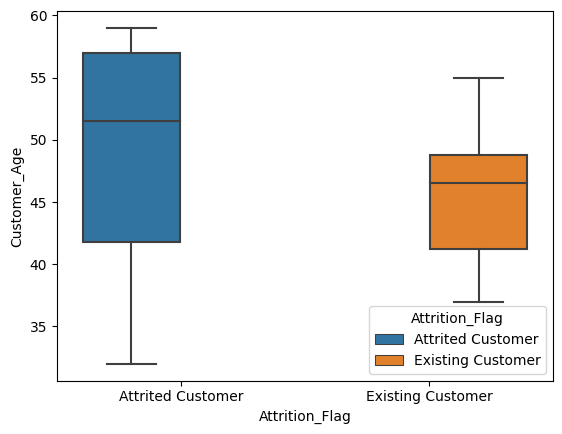

In [80]:
#visualisasi boxplot aget dengan attrition flag sebagai pemisahnya
sns.boxplot(df, y = "Customer_Age", x = "Attrition_Flag", hue = "Attrition_Flag")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

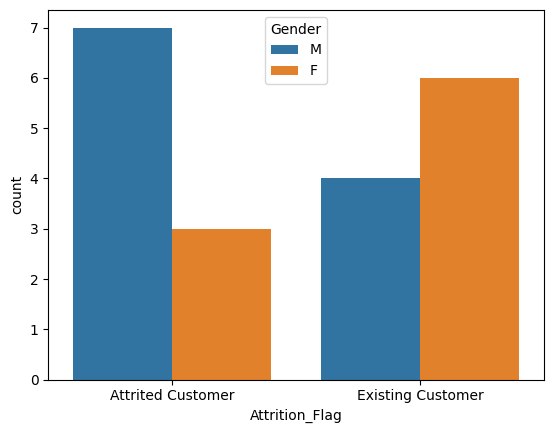

In [81]:
#visualisasi countplot attrition flag dengan jenis kelamin sebagai pemisahnya
sns.countplot(df, x = "Attrition_Flag", hue = "Gender")

<AxesSubplot:>

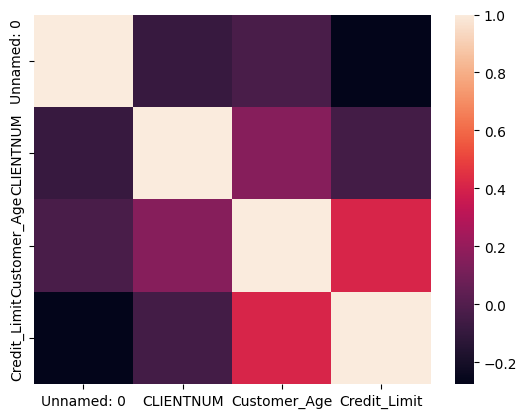

In [82]:
#heatmap numeric
sns.heatmap(df.corr())

# NAIVE BAYES

In [83]:
#dataset baru
df_new = df[["Attrition_Flag", 'Gender', 'Education_Level', "Marital_Status", 'Income_Category', 'Card_Category']]

In [84]:
#pemisahan label (attrited customer dan existing customer)
def label():
    attrited = 0
    existing = 0
    z = len(df_new)

    for i in df_new["Attrition_Flag"]:
        if i == "Attrited Customer":
            attrited += 1
        else:
            existing += 1
    label = [attrited, existing]
    return label

In [85]:
#Memisahkan kategori dan jumlah dari kategori
def pisah(df, classify):
    df.to_dict()
    for key, value in df.items():
        if key == classify:
            classify = df.get(key)
            return classify

In [86]:
#rumus classifier naive_bayes
def naive_bayes(prediksi):
    labeling = label()
    df_new =  df[["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]]

    #narik tiap data dari list
    gender = prediksi[0]
    edu = prediksi[1]
    marital = prediksi[2]
    income = prediksi[3]
    card = prediksi[4]

    nb = np.array([pisah(df_new["Gender"].value_counts(), gender), 
                   pisah(df_new["Education_Level"].value_counts(), edu),
                   pisah(df_new["Marital_Status"].value_counts(), marital),
                    pisah(df_new["Income_Category"].value_counts(), income),
                    pisah(df_new["Card_Category"].value_counts(), card)])  
    
    #hitung nilai p untuk tiap kategori
    att_cust = nb / [labeling[0]]
    ex_cust = nb / [labeling[1]]

     #hitung nilai P tiap label
    att_cust= np.prod(att_cust)
    ex_cust = np.prod(ex_cust)

    #hitung nilai P label x P total
    att_cust *= (labeling[0]/len(df_new))
    ex_cust *= (labeling[1]/len(df_new))

    #hasil dari hitungan probabilitas
    if att_cust > ex_cust:
        hasil = "Attired Customer"
        probabilitas = round(att_cust,2)
        return hasil, probabilitas
    
    elif att_cust == ex_cust:
        hasil = "Attired Customer"
        probabilitas = round(att_cust,2)
        return hasil, probabilitas
    
    elif att_cust< ex_cust:
        hasil = "Existing_customer"
        probabilitas = round(ex_cust,2)
        return hasil, probabilitas

    else:
        print("gagal")

In [87]:
#pemanggilan fungsi dan memasukkan data

data = ["F", "Uneducated", "Single", "Unknown", "Blue"]
print(naive_bayes(data))

('Attired Customer', 0.2)
